# FINAL PROJECT 2: EVALUATION OF LOGISTIC REGRESSION AND SVM CONCEPTS
This project is prepared to fulfill the second final assignment of the course Introduction to Python for Data Science.

### Group Members:
1. Tamara Cyntia Elizabeth Sihombing
2. Taj Mahdy Muhadzdzib

## Introduction

Rainfall prediction plays a crucial role in various sectors, including agriculture, water resource management, and disaster preparedness. Machine learning techniques have proven to be effective in analyzing historical data and making accurate predictions. In this context, this project aims to develop a machine learning model to predict rainfall using historical data from the "Rain in Australia" dataset available on [Kaggle](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package).

The dataset contains a comprehensive collection of weather features, such as temperature, humidity, wind speed, and atmospheric pressure, recorded at different locations across Australia. It also includes a binary target variable indicating whether rain occurred on a particular day. By leveraging this dataset and employing machine learning algorithms, we can build a predictive model capable of forecasting rainfall in the future.

The process of developing the machine learning model involves several key steps. Firstly, we will perform data preprocessing to handle missing values, outliers, and normalize the features as required. Next, we will explore the dataset through data visualization and statistical analysis to gain insights into the relationships between variables and their impact on rainfall.

Subsequently, we will select appropriate machine learning algorithms, such as decision trees, random forests, or gradient boosting, to train and validate the model. The dataset will be split into training and testing sets, enabling us to evaluate the model's performance and ensure its ability to generalize well on unseen data.

Throughout the project, feature engineering techniques will be employed to extract relevant information and improve the model's predictive capabilities. This may involve creating new features, transforming existing ones, or selecting the most significant variables based on statistical analysis or domain knowledge.

The ultimate goal of this project is to develop a reliable machine learning model that accurately predicts rainfall based on historical data. The model's performance will be assessed using appropriate evaluation metrics, such as accuracy, precision, recall, and F1 score. Successful implementation of this model can have significant implications for various industries, aiding in better decision-making, resource allocation, and mitigating the impact of rainfall-related events.

By leveraging the power of machine learning and historical data from the "Rain in Australia" dataset, this project aims to contribute to the field of rainfall prediction and provide valuable insights for effective planning and management in regions prone to variable weather patterns.

## Import Library

In [1]:
# Data Wrangling
import numpy as np
import sympy as sp
import pandas as pd
from dython.nominal import associations

# Data Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from pickle import dump,load

# Settings
pd.set_option("display.max.columns",None)
%matplotlib inline
mpl.style.use(["ggplot"])

## Load Dataset

In [2]:
df = pd.read_csv('weatherAUS.csv')
df.columns = df.columns.str.lower()
df.head()

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,raintomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
print(f"Number of Rows\t\t: {df.shape[0]}")
print(f"Number of Columns\t: {df.shape[1]}")

Number of Rows		: 145460
Number of Columns	: 23


The dataset which has 145,460 rows and 23 columns.

## Data Cleaning

In [4]:
# View the data types of each column
print(df.dtypes)

date              object
location          object
mintemp          float64
maxtemp          float64
rainfall         float64
evaporation      float64
sunshine         float64
windgustdir       object
windgustspeed    float64
winddir9am        object
winddir3pm        object
windspeed9am     float64
windspeed3pm     float64
humidity9am      float64
humidity3pm      float64
pressure9am      float64
pressure3pm      float64
cloud9am         float64
cloud3pm         float64
temp9am          float64
temp3pm          float64
raintoday         object
raintomorrow      object
dtype: object


In [5]:
# Check the number of rows without missing values for each column
print(df.count())

date             145460
location         145460
mintemp          143975
maxtemp          144199
rainfall         142199
evaporation       82670
sunshine          75625
windgustdir      135134
windgustspeed    135197
winddir9am       134894
winddir3pm       141232
windspeed9am     143693
windspeed3pm     142398
humidity9am      142806
humidity3pm      140953
pressure9am      130395
pressure3pm      130432
cloud9am          89572
cloud3pm          86102
temp9am          143693
temp3pm          141851
raintoday        142199
raintomorrow     142193
dtype: int64


Viewing general information about the data (data types, number of rows without missing values):

In [6]:
missing_value=pd.DataFrame({'jumlah_nan':df.isnull().sum(),
                         'persentase_nan(%)':(df.isnull().sum()/df.shape[0])*100})
missing_value

,jumlah_nan,persentase_nan(%)
date,0,0.000000
location,0,0.000000
mintemp,1485,1.020899
maxtemp,1261,0.866905
rainfall,3261,2.241853
evaporation,62790,43.166506
sunshine,69835,48.009762
windgustdir,10326,7.098859
windgustspeed,10263,7.055548
winddir9am,10566,7.263853


Retrieve information about the dataset, including NaN values.

In [7]:
pd.DataFrame({
    "type":df.dtypes.values,
    "null":df.isnull().sum().values,
    "null_percentage":df.isnull().sum().values / len(df) * 100,
    "unique":[df[i].nunique() for i in df.columns],
    "sample":[list(pd.Series(df.dropna()[i].unique()).sample())[0] for i in df.columns]
}).set_index(df.isnull().sum().index).sort_values("null",ascending=False)

,type,null,null_percentage,unique,sample
sunshine,float64,69835,48.009762,145,5.7
evaporation,float64,62790,43.166506,358,48.8
cloud3pm,float64,59358,40.807095,10,4.0
cloud9am,float64,55888,38.421559,10,2.0
pressure9am,float64,15065,10.356799,546,990.3
pressure3pm,float64,15028,10.331363,549,1007.1
winddir9am,object,10566,7.263853,16,E
windgustdir,object,10326,7.098859,16,SW
windgustspeed,float64,10263,7.055548,67,104.0
humidity3pm,float64,4507,3.098446,101,72.0


As it can be seen, sunshine, evaporation, cloud3pm, and cloud9am features have lots of NaN values. Replacing those might increase the inaccuracy of the dataset. Thus, those features can be dropped instead. Furthermore, date feature can be dropped as well because this isn't a time series analysis.

In [8]:
df = df.drop(["date"] + list(df.isnull().sum().sort_values(ascending=False).iloc[:4].index),axis=1)

Specify which features are categorical and numerical.

In [9]:
categorical_cols = df.columns[df.dtypes == object]
numerical_cols = df.columns[df.dtypes != object]

print(f"Categorical Columns\t({len(categorical_cols)})\t: {list(categorical_cols)}")
print(f"Numerical Columns\t({len(numerical_cols)})\t: {list(numerical_cols)}")

Categorical Columns	(6)	: ['location', 'windgustdir', 'winddir9am', 'winddir3pm', 'raintoday', 'raintomorrow']
Numerical Columns	(12)	: ['mintemp', 'maxtemp', 'rainfall', 'windgustspeed', 'windspeed9am', 'windspeed3pm', 'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm', 'temp9am', 'temp3pm']


Replace NaN values in categorical and numerical features with their modes and means respectively.

In [10]:
print("Categorical Columns")
for i in categorical_cols:
    df[i] = df[i].fillna(df[i].mode().values[0])
    print(f"NaN values in {i} have been replaced by {df[i].mode().values[0]}")

print("\nNumerical Columns")
for i in numerical_cols:
    df[i] = df[i].fillna(df[i].mean())
    print(f"NaN values in {i} have been replaced by {df[i].mean()}")

Categorical Columns
NaN values in location have been replaced by Canberra
NaN values in windgustdir have been replaced by W
NaN values in winddir9am have been replaced by N
NaN values in winddir3pm have been replaced by SE
NaN values in raintoday have been replaced by No
NaN values in raintomorrow have been replaced by No

Numerical Columns
NaN values in mintemp have been replaced by 12.194034380968839
NaN values in maxtemp have been replaced by 23.22134827564668
NaN values in rainfall have been replaced by 2.3609181499170364
NaN values in windgustspeed have been replaced by 40.035230071663854
NaN values in windspeed9am have been replaced by 14.043425914971664
NaN values in windspeed3pm have been replaced by 18.66265677888777
NaN values in humidity9am have been replaced by 68.88083133761891
NaN values in humidity3pm have been replaced by 51.5391158755115
NaN values in pressure9am have been replaced by 1017.6499397985187
NaN values in pressure3pm have been replaced by 1015.2558888310605

Detect and visualize outliers:

In [11]:
def create_boxplot(num1,num2,data,x_axis):
    nrows,ncols = num1,num2

    fig,ax=plt.subplots(nrows,ncols,figsize=(25,15),dpi=200)

    n = 0
    for i in range(nrows):
        for j in range(ncols):
            sns.boxplot(data=data,x=x_axis[n],ax=ax[i,j])
            ax[i,j].set_title(f"Box Plot of {x_axis[n]}")
            n += 1

    plt.tight_layout()
    plt.show()

def find_outlier(data):
    q1 = np.quantile(data,0.25)
    q3 = np.quantile(data,0.75)
    
    iqr = q3 - q1
    min_iqr = q1 - (1.5 * iqr)
    max_iqr = q3 + (1.5 * iqr)
    
    outlier = []
    for i in data:
        if (i < min_iqr) or (i > max_iqr):
            outlier.append(i)
    
    return outlier

Detect and visualize outliers for each numerical feature using boxplot

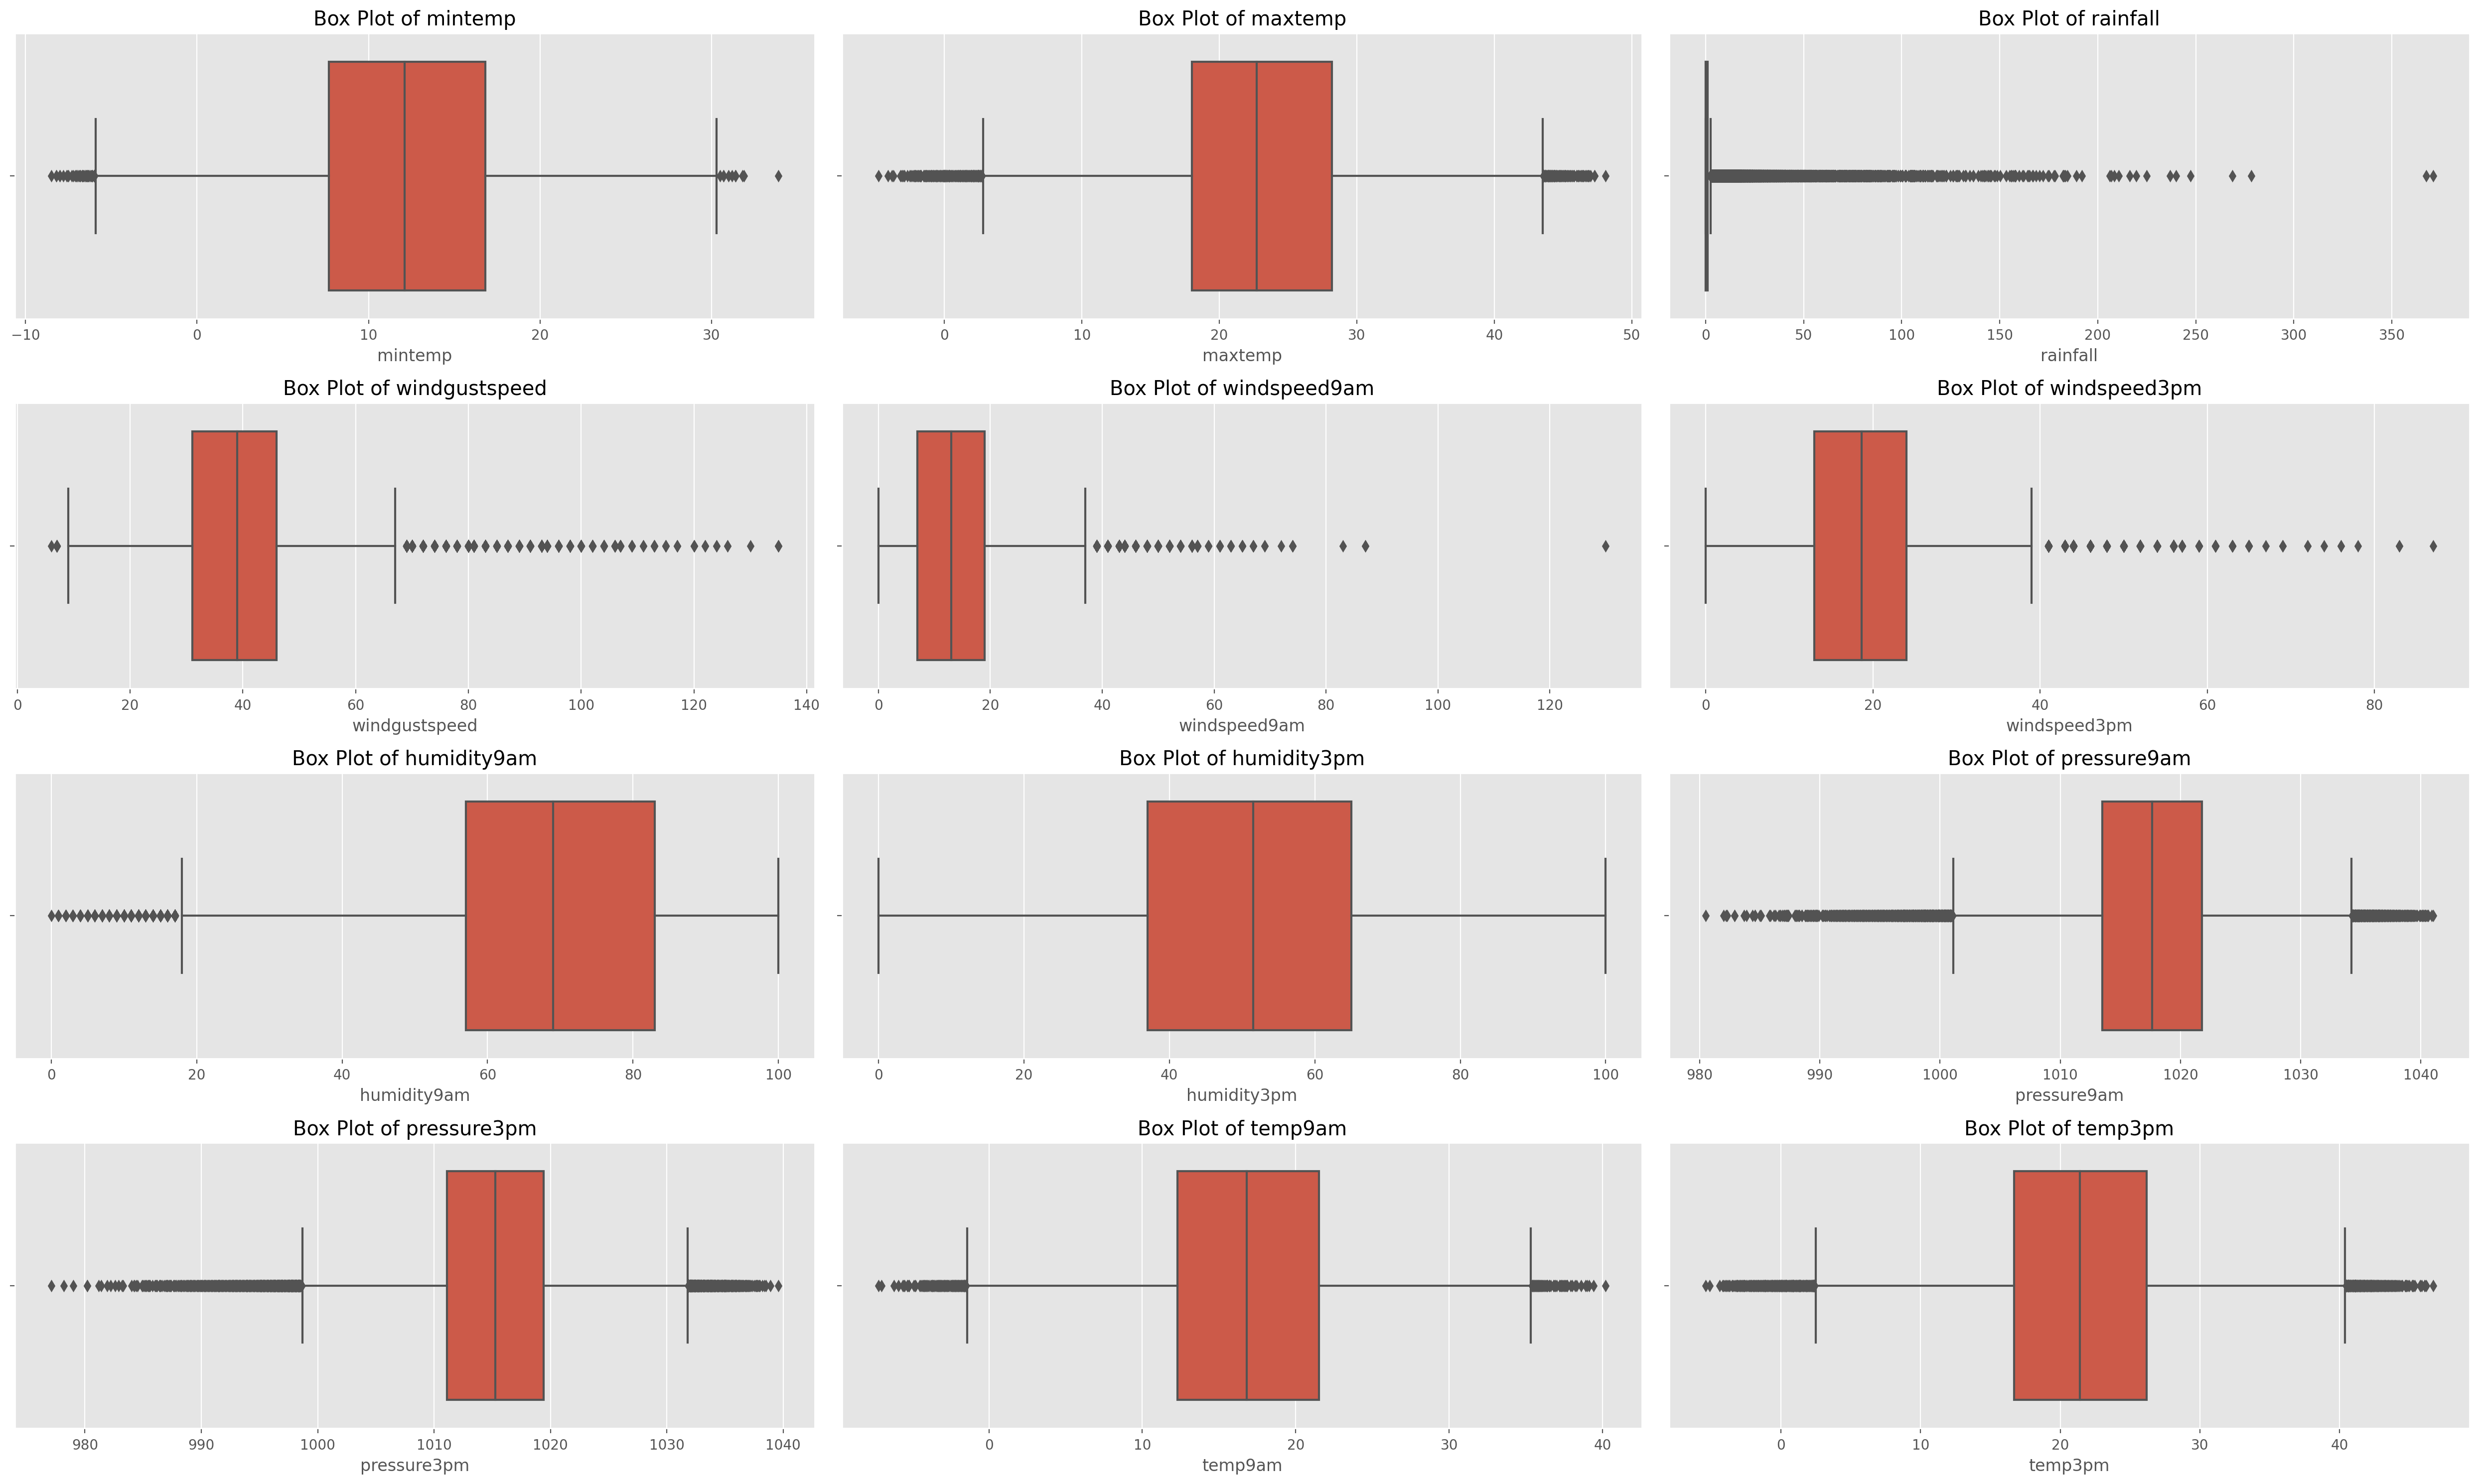

,outliers,percentage
rainfall,23723,16.308951
windgustspeed,5523,3.796920
pressure9am,2758,1.896054
pressure3pm,2524,1.735185
windspeed3pm,2523,1.734497
windspeed9am,1817,1.249141
humidity9am,1425,0.979651
temp3pm,988,0.679225
maxtemp,544,0.373986
temp9am,307,0.211055


In [12]:
create_boxplot(4,3,df,numerical_cols)

pd.DataFrame({
    "outliers":[len(j) for j in [find_outlier(df[i]) for i in numerical_cols]],
    "percentage":np.array([len(j) for j in [find_outlier(df[i]) for i in numerical_cols]]) / len(df) * 100
}).set_index(numerical_cols).sort_values("outliers",ascending=False)

As it can be seen, there are lots of outliers. Remove outliers by only taking the values that are within the upper and lower limits.

In [13]:
for i in numerical_cols:
    q1 = np.quantile(df[i],0.25)
    q3 = np.quantile(df[i],0.75)
    
    iqr = q3 - q1
    min_iqr = q1 - (1.5 * iqr)
    max_iqr = q3 + (1.5 * iqr)

    df = df[(df[i] >= min_iqr) & (df[i] <= max_iqr)]

Detect and visualize outliers for the 2nd time. As it can be seen, although rainfall feature still has a few outliers, overall it's much better than it was. Also, remove outliers in rainfall feature will reduce the size of the dataset significantly, so we'll leave as it is now.

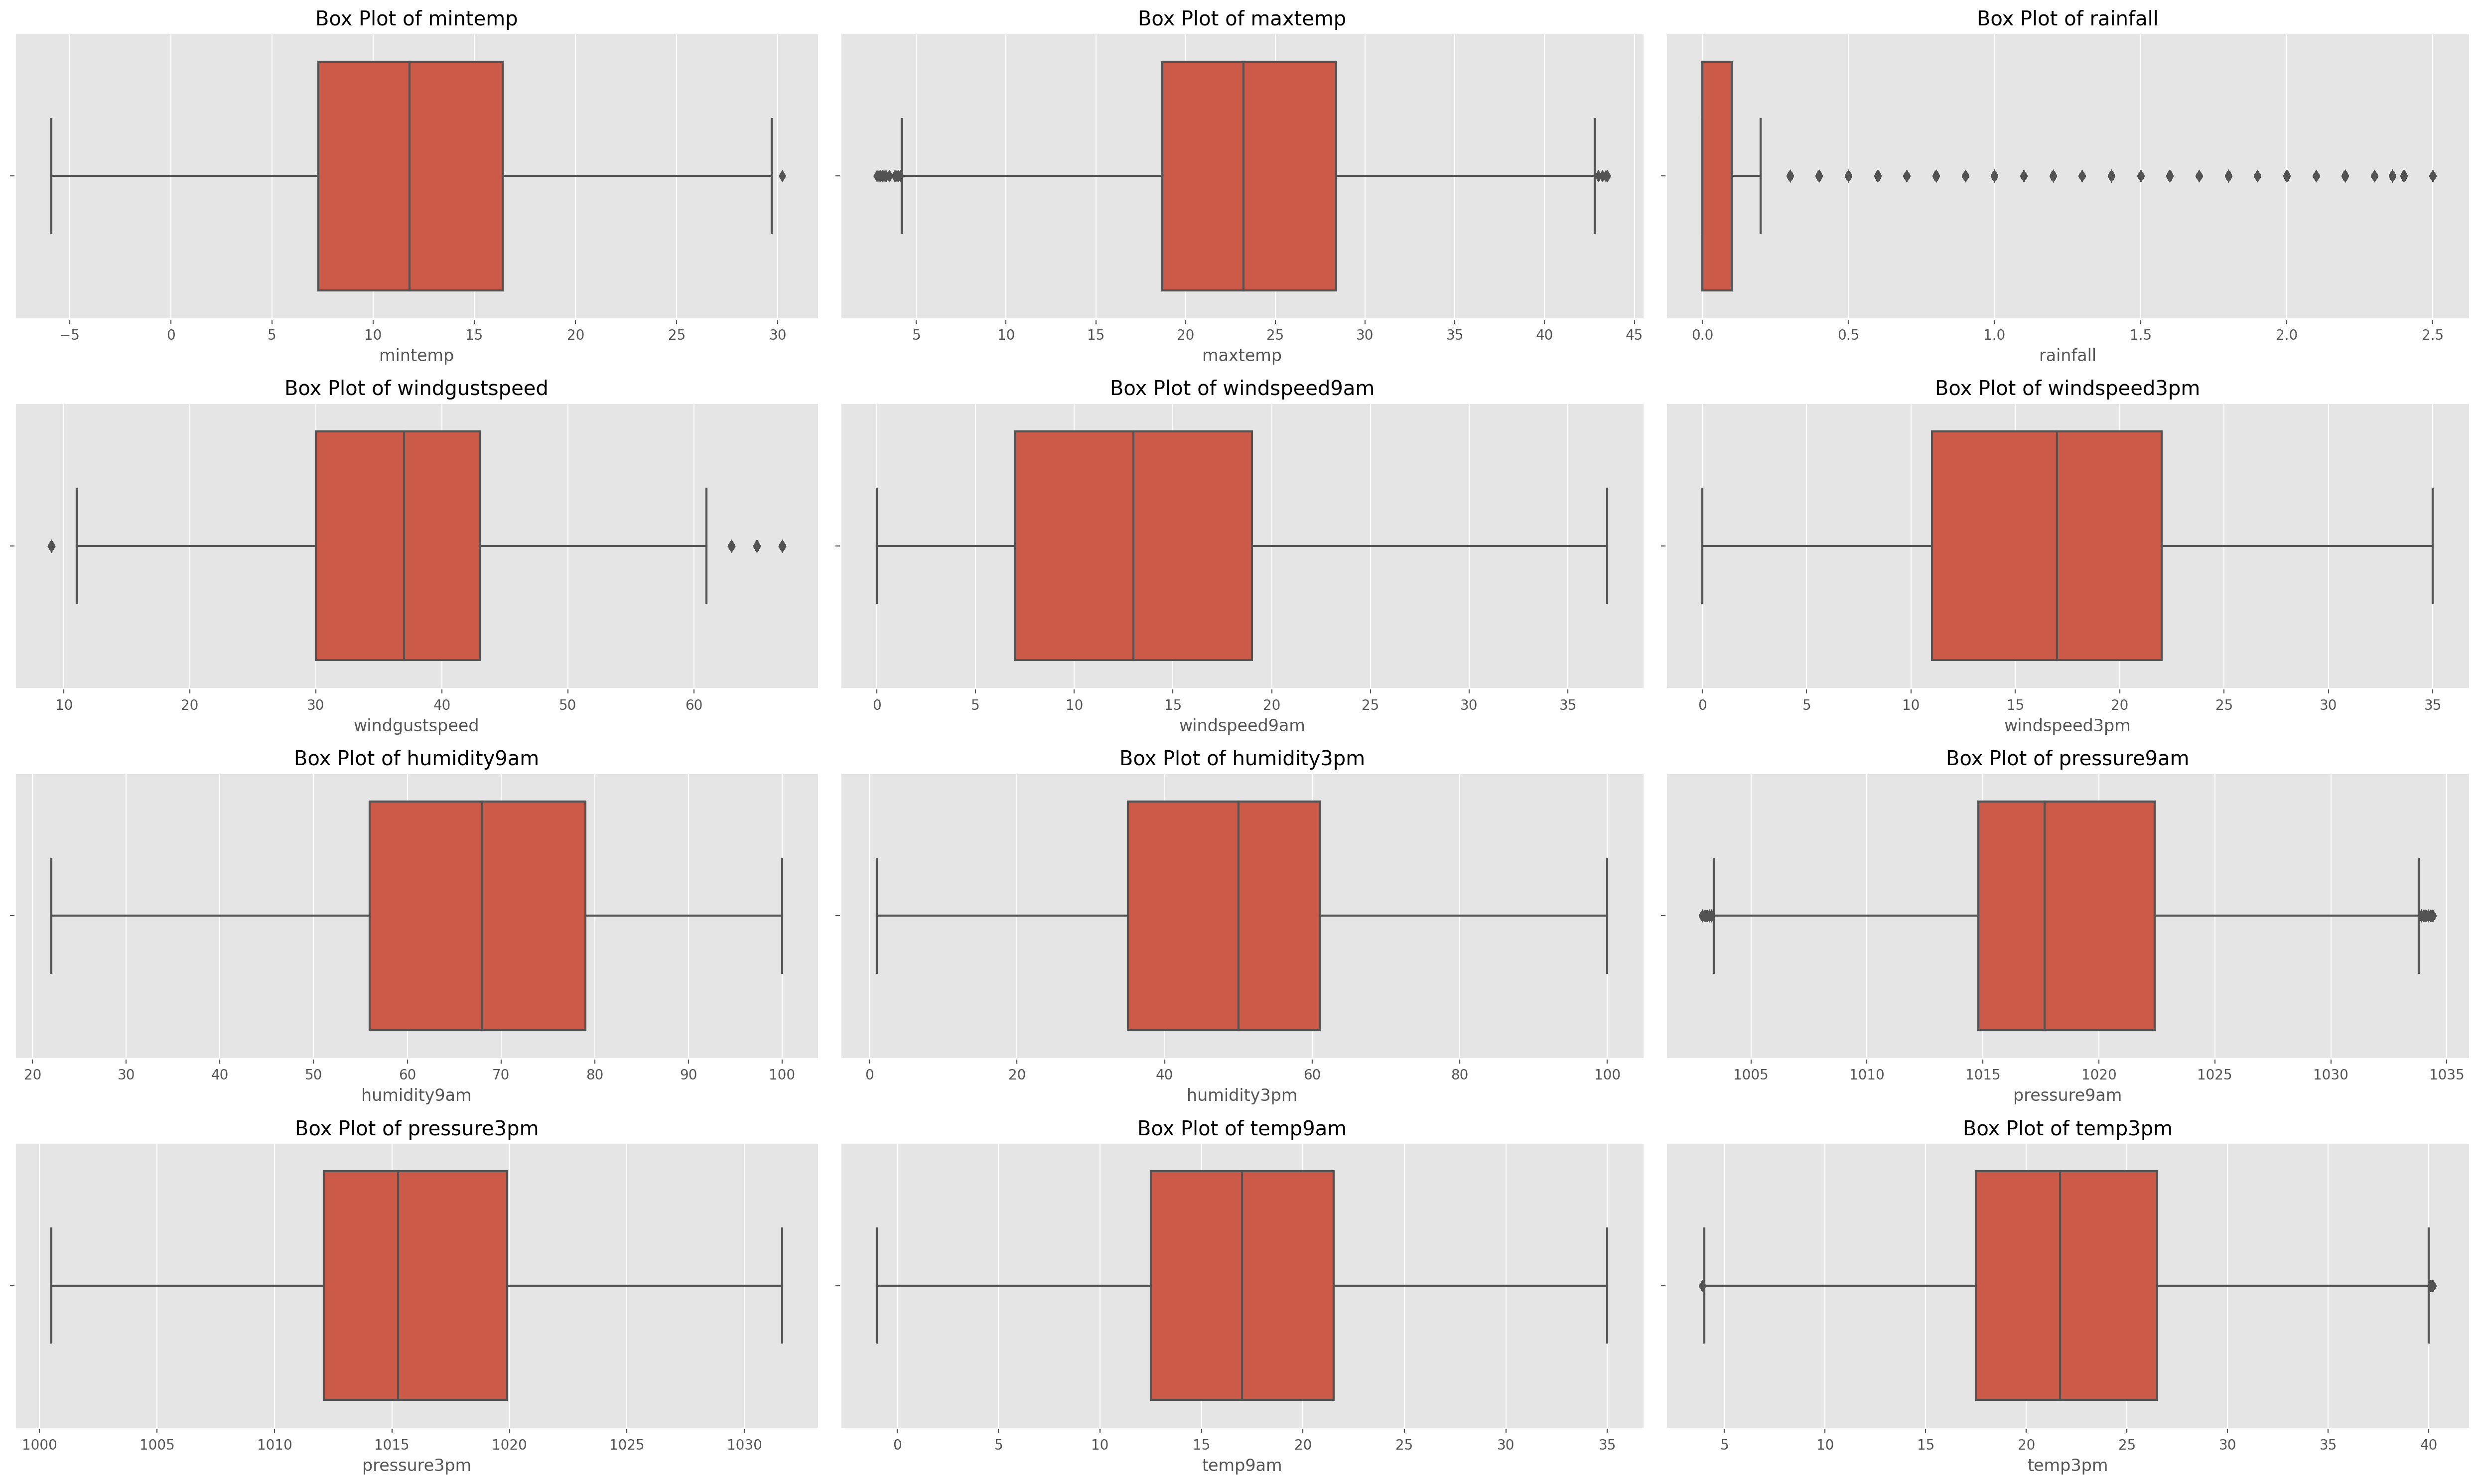

,outliers,percentage
rainfall,19371,17.598321
windgustspeed,1531,1.390895
pressure9am,283,0.257102
temp3pm,33,0.029980
maxtemp,20,0.018170
mintemp,1,0.000908
windspeed9am,0,0.000000
windspeed3pm,0,0.000000
humidity9am,0,0.000000
humidity3pm,0,0.000000


In [14]:
create_boxplot(4,3,df,numerical_cols)

pd.DataFrame({
    "outliers":[len(j) for j in [find_outlier(df[i]) for i in numerical_cols]],
    "percentage":np.array([len(j) for j in [find_outlier(df[i]) for i in numerical_cols]]) / len(df) * 100
}).set_index(numerical_cols).sort_values("outliers",ascending=False)

After successfully handling outliers, we will proceed to perform a correlation test using a correlation matrix with the Dython library.

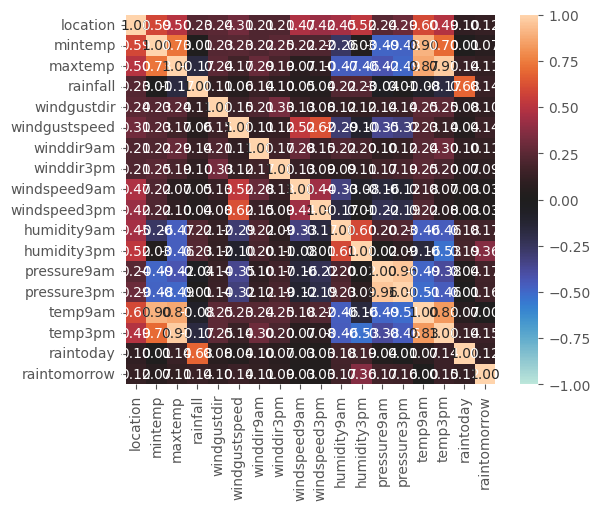

In [15]:
corr = associations(df)

After obtaining the correlation data, we will proceed to rank the variables based on their influence on predicting future rainfall

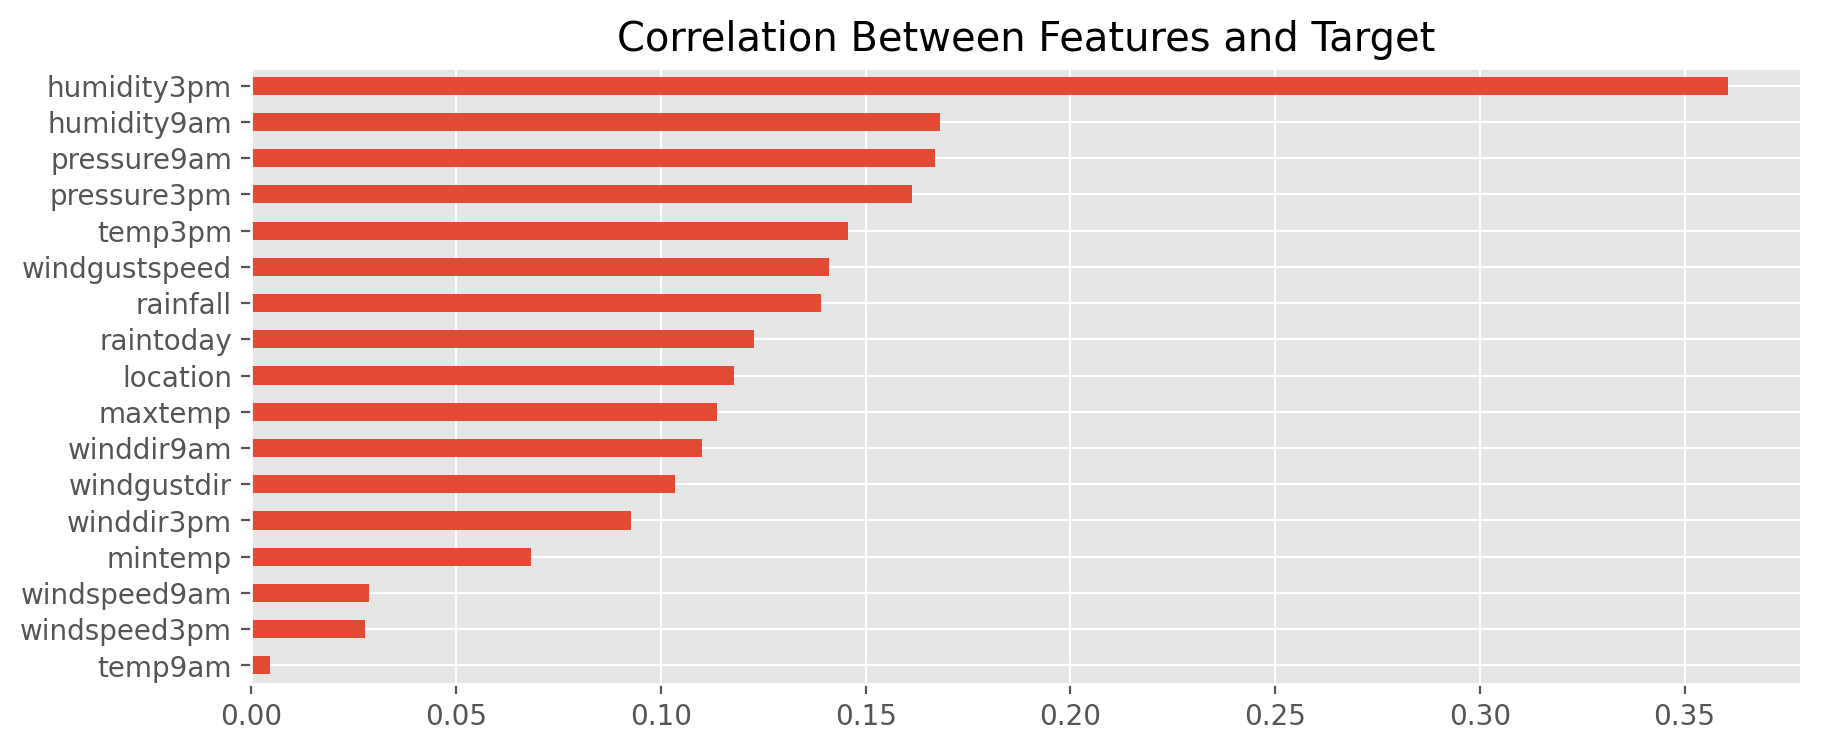

In [16]:
fig = plt.figure(figsize=(10,4),dpi=200)
corr["corr"][["raintomorrow"]].iloc[:-1].sort_values("raintomorrow").plot(
    kind="barh",
    legend=None,
    title="Correlation Between Features and Target",
    ax=plt.gca()
)
plt.show()

After obtaining the correlation bar chart, we will proceed to remove the columns of variables with the three lowest correlations.

In [17]:
df = df.drop(corr["corr"][["raintomorrow"]].sort_values("raintomorrow").iloc[:3].index,axis=1)
df.head()

,location,mintemp,maxtemp,rainfall,windgustdir,windgustspeed,winddir9am,winddir3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,temp3pm,raintoday,raintomorrow
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,71.0,22.0,1007.7,1007.1,21.8,No,No
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,44.0,25.0,1010.6,1007.8,24.3,No,No
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,38.0,30.0,1007.6,1008.7,23.2,No,No
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,45.0,16.0,1017.6,1012.8,26.5,No,No
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,82.0,33.0,1010.8,1006.0,29.7,No,No


In [18]:
print(f"Number of Rows\t\t: {df.shape[0]}")
print(f"Number of Columns\t: {df.shape[1]}")

Number of Rows		: 110073
Number of Columns	: 15


Now we have dataset with 110073 and 15 columns.

## Data Exploration Analysis

##### Check the Statistics Descriptive

In [19]:
df.describe()

,mintemp,maxtemp,rainfall,windgustspeed,humidity9am,humidity3pm,pressure9am,pressure3pm,temp3pm
count,110073.000000,110073.000000,110073.000000,110073.000000,110073.000000,110073.000000,110073.000000,110073.000000,110073.000000
mean,11.918204,23.676133,0.242859,37.373731,67.527997,49.031376,1018.577212,1015.970052,22.163051
std,6.309041,6.628353,0.577351,10.304128,17.236884,18.808348,5.856722,5.869869,6.379500
min,-5.900000,2.800000,0.000000,9.000000,22.000000,1.000000,1002.900000,1000.500000,3.900000
25%,7.300000,18.700000,0.000000,30.000000,56.000000,35.000000,1014.800000,1012.100000,17.500000
50%,11.800000,23.221348,0.000000,37.000000,68.000000,50.000000,1017.649940,1015.255889,21.683390
75%,16.400000,28.400000,0.100000,43.000000,79.000000,61.000000,1022.400000,1019.900000,26.500000
max,30.200000,43.500000,2.500000,67.000000,100.000000,100.000000,1034.400000,1031.600000,40.200000


**Conclusion:** From the information above, the following can be inferred:

- The average lowest temperature in a day is 12.413776 degrees Celsius, while the average highest temperature is 23.474582 degrees Celsius.

- The temperature at 9 AM and 3 PM shows a very small difference, indicating that the temperature throughout the day tends to be similar.

- The average rainfall is 8.528039 mm, and the highest recorded rainfall can reach 367.6 mm.

- The air humidity at 3 PM tends to be lower than the air humidity at 9 AM.

##### See how often it rains by visualizing both *raintoday* and *raintomorrow*.

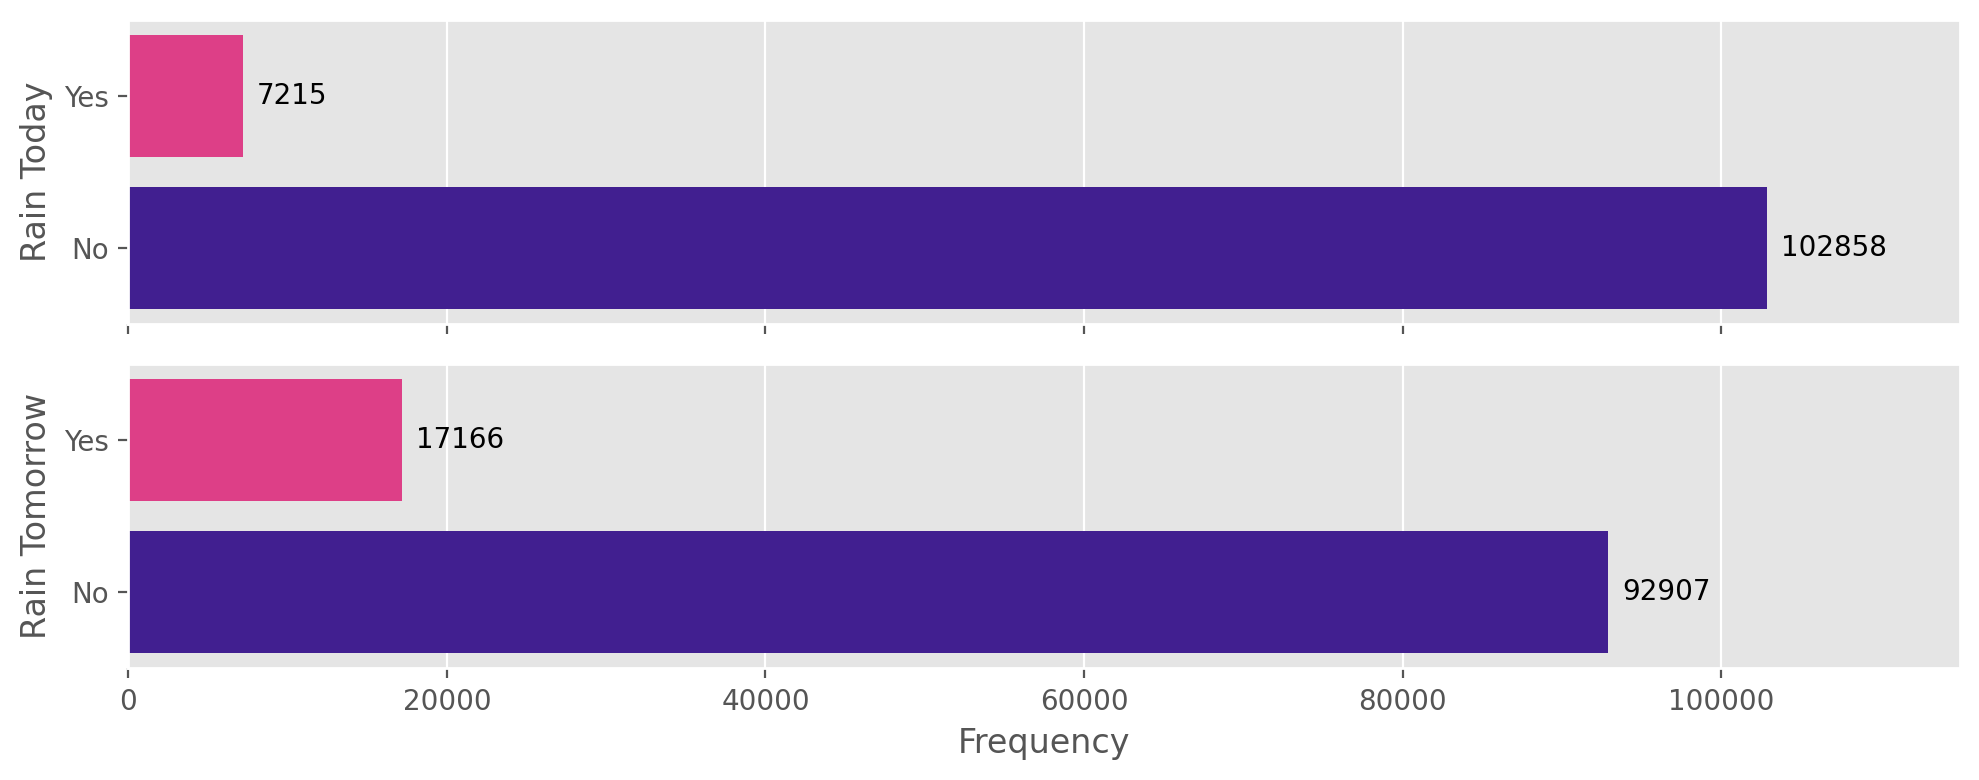

In [20]:
nrows,ncols = 2,1
fig,ax = plt.subplots(figsize=(10,4),dpi=200,nrows=nrows,ncols=ncols,sharex=True)

for i,j,k in zip(range(nrows),["raintoday","raintomorrow"],["Rain Today","Rain Tomorrow"]):
    countplot = sns.countplot(data=df,y=j,palette=["#F72585","#3A0CA3"],order=["Yes","No"],ax=ax[i])
    for l in countplot.containers:
        countplot.bar_label(l,padding=5)
    ax[i].set_xlabel("")
    ax[i].set_xlim(0,115000)
    ax[i].set_ylabel(k)

ax[1].set_xlabel("Frequency")
plt.tight_layout()
plt.show()

**Conlusion**: As it can be seen, the dataset isn't evenly distributed within these 2 classes.

##### Calculate the percentage of occurrence of rain on the next day based on whether if it rains today or not.

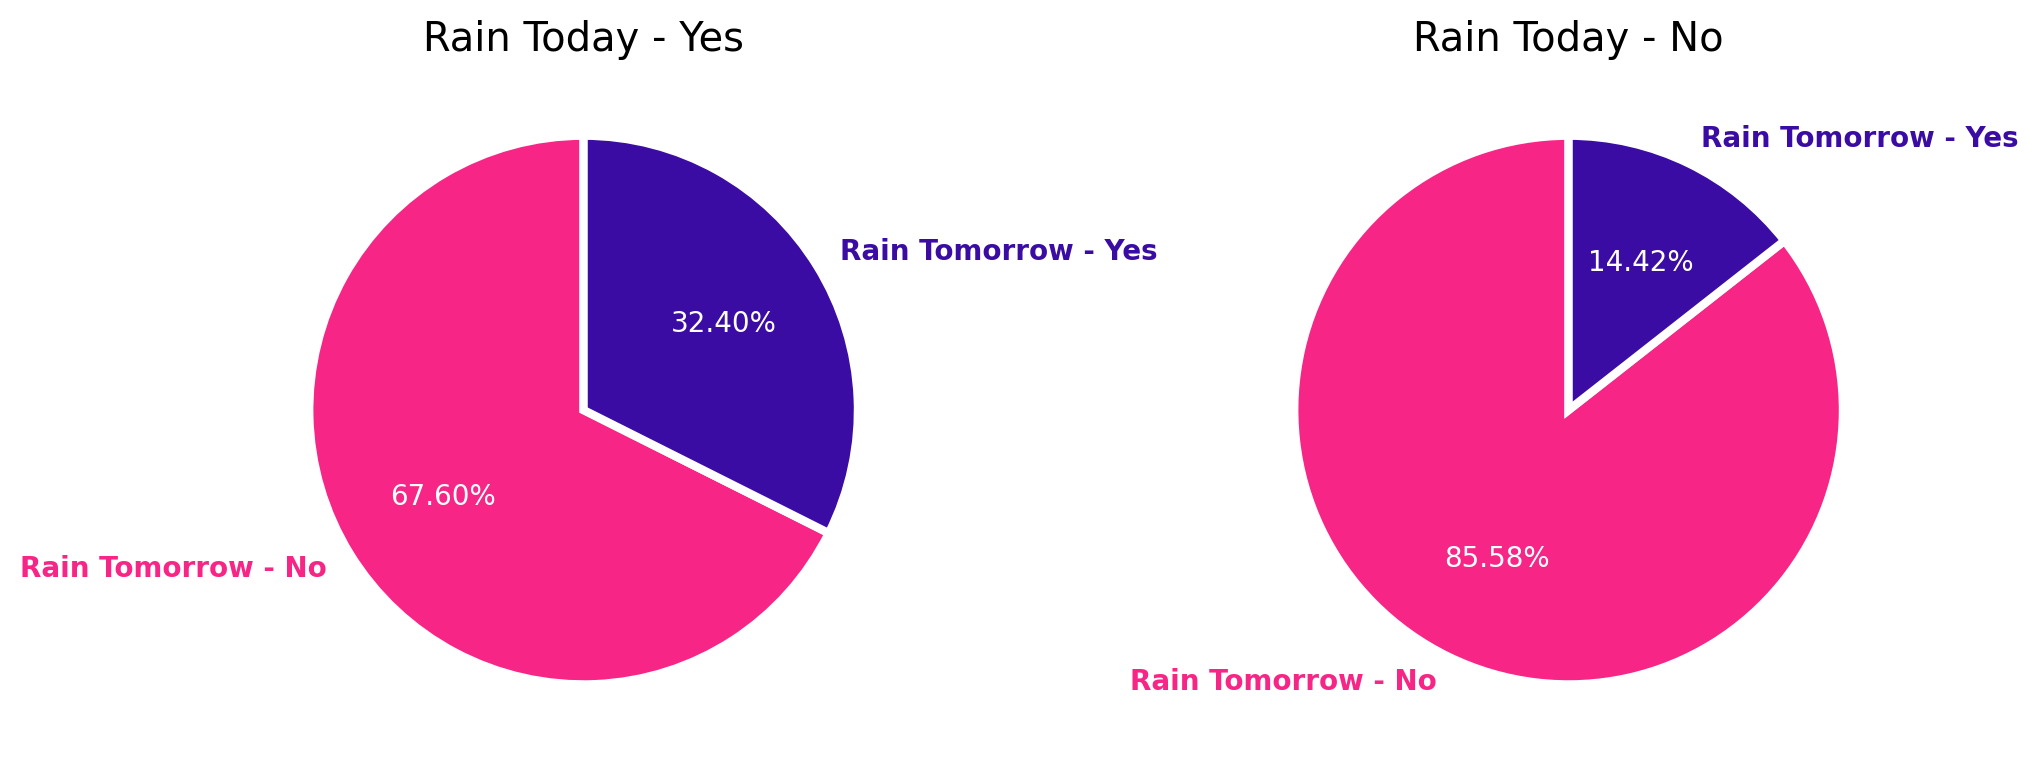

In [21]:
nrows,ncols = 1,2
fig,ax = plt.subplots(figsize=(10,4),dpi=200,nrows=nrows,ncols=ncols)

for i,j in zip(range(ncols),["Yes","No"]):
    patches,texts,pcts = ax[i].pie(
        np.ravel(df.groupby(["raintoday","raintomorrow"]).count()[["location"]].loc[j].values),
        labels=["Rain Tomorrow - No","Rain Tomorrow - Yes"],
        startangle=90,
        colors=["#F72585","#3A0CA3"],
        autopct="%.2f%%",
        wedgeprops={"linewidth":3.0,"edgecolor":"white"},
    )
    for k,patch in enumerate(patches):
        texts[k].set_color(patch.get_facecolor())

    plt.setp(pcts,color="white")
    plt.setp(texts,fontweight=600)

    ax[i].set_title(f"Rain Today - {j}")
    
plt.tight_layout()
plt.show()

**Conclusion**: As it can be seen, if it rains today, there's a greater chance that it'll rain on the next day as well.

Calculate each location's average rainfall.

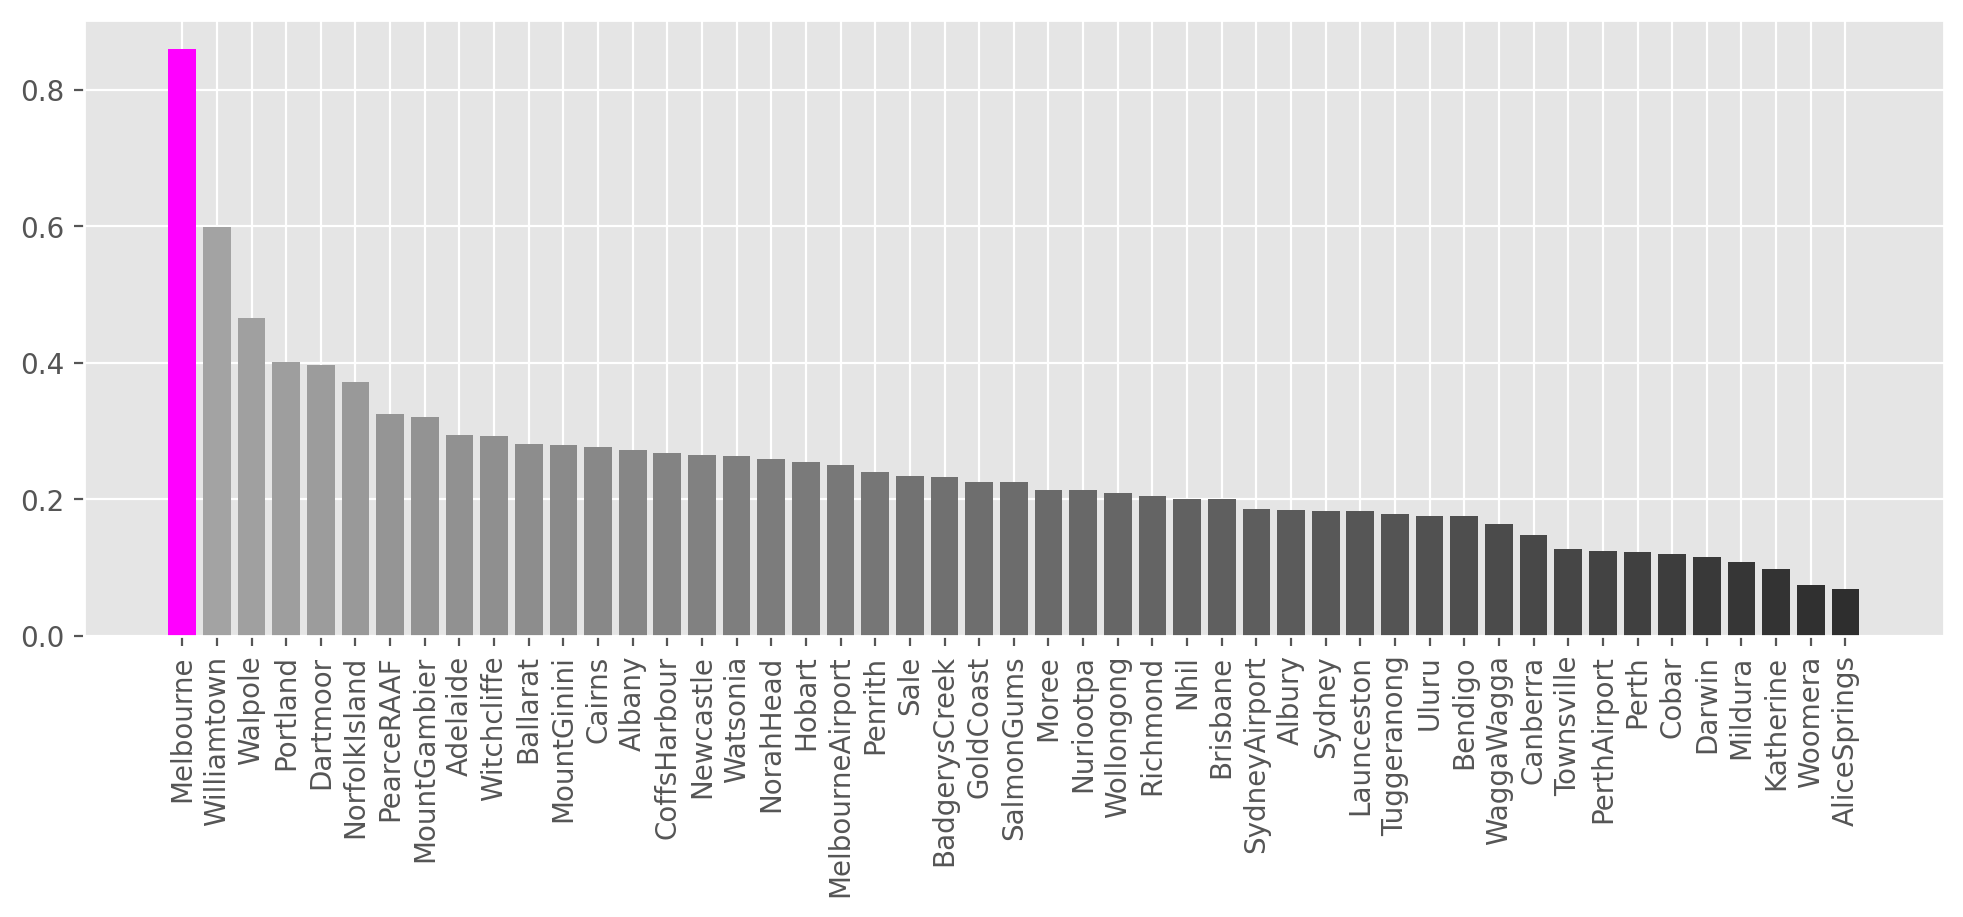

In [22]:
plt.figure(figsize=(12,4),dpi=200)

plt.bar(
    df.groupby("location").mean()[["rainfall"]].sort_values("rainfall",ascending=False).index,
    np.ravel(df.groupby("location").mean()[["rainfall"]].sort_values("rainfall",ascending=False).values),
    color=["fuchsia"] + list(plt.get_cmap("Greys")(np.linspace(0.45,0.85,df["location"].nunique())))[1:]
)

plt.xticks(rotation=90)
plt.show()

As it can be seen, Melbourne (highlighted in purple) has the highest rainfall of 0.8+.

##### Create a dataframe that contains wind directions when it rains and when it doesn't rain tomorrow.

In [23]:
yes = pd.DataFrame(df[df['raintomorrow']=='Yes'].groupby(['windgustdir'])['windgustdir'].count())
yes.rename(columns = {'windgustdir':'Yes'}, inplace=True)
no = pd.DataFrame(df[df['raintomorrow']=='No'].groupby(['windgustdir'])['windgustdir'].count())
no.rename(columns={'windgustdir':'No'}, inplace=True)
data_Wind = pd.concat([yes,no], axis=1).reset_index()
data_Wind

,windgustdir,Yes,No
0,E,773,6779
1,ENE,768,6112
2,ESE,676,5356
3,N,1521,5477
4,NE,905,5069
5,NNE,970,4389
6,NNW,1101,3894
7,NW,1220,4545
8,S,953,5679
9,SE,908,6563


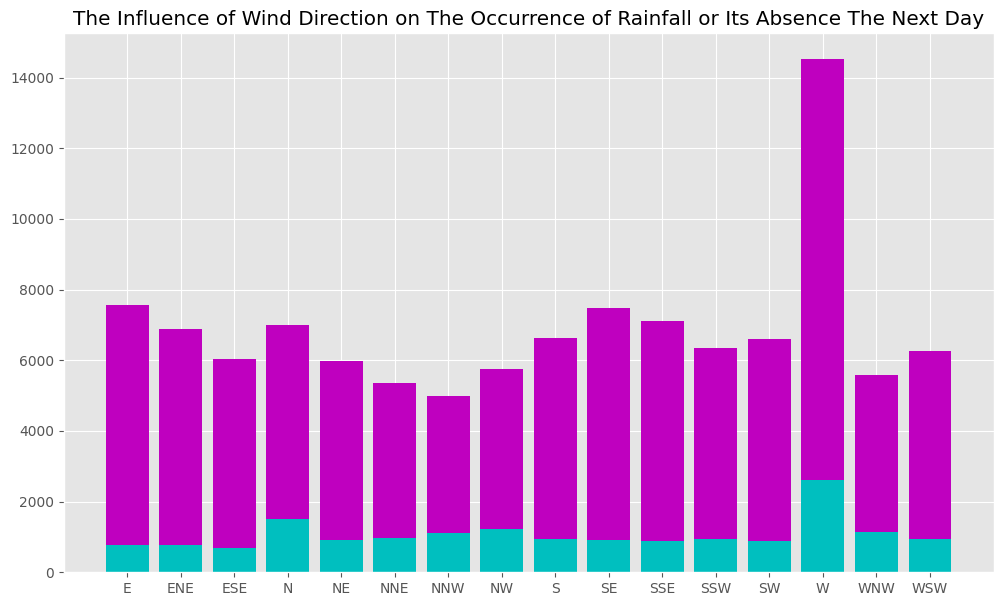

In [24]:
x = data_Wind['windgustdir']
y1 = data_Wind['Yes']
y2 = data_Wind['No']

plt.figure(figsize=(12,7))
plt.bar(x, y1, color='c')
plt.bar(x, y2, bottom=y1, color='m')

plt.title('The Influence of Wind Direction on The Occurrence of Rainfall or Its Absence The Next Day')

plt.show()

**Conclusion:** Based on the plot above, it can be concluded that the likelihood of rainfall the next day is not influenced by wind direction because for each wind direction, it mostly indicates the absence of rainfall. However, there is a frequent occurrence of rainfall the next day when the wind is blowing from the west and north directions.

## Data Preprocessing

Define features (X) and target (y). We'll use get_dummies() to convert categorical features into dummy or indicator features.

In [25]:
X = pd.get_dummies(df.drop("raintomorrow",axis=1),drop_first=True)
y = df["raintomorrow"]

Split data frame into training and testing sets with ratio 70:30

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

print(f"Training dataset\t: {len(X_train)} ({round(len(X_train) / len(X) * 100)}%)")
print(f"Testing dataset\t\t: {len(X_test)} ({round(len(X_test) / len(X) * 100)}%)")

Training dataset	: 77051 (70%)
Testing dataset		: 33022 (30%)


Due to all featues have different scales, we'll standardize them with *StandardScaler()*.

In [27]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Model Definition and Training

Create a logistic regression model and train it with the training dataset. In this case, the parameter class_weight = balanced is used to deal with class imbalance by giving different weights to both the majority and minority classes.

In [28]:
log_model = LogisticRegression(class_weight="balanced", random_state=42, max_iter=5000)
log_model.fit(scaled_X_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=5000, random_state=42)

Use the logistic regression model to predict raintomorrow and calculate each class probability.

In [29]:
log_pred = log_model.predict(scaled_X_test)
log_prob = log_model.predict_proba(scaled_X_test)

In [30]:
pd.DataFrame({
    "probability_yes_raintomorrow":log_prob[:,1] * 100,
    "probability_no_raintomorrow":log_prob[:,0] * 100,
    "prediction_raintomorrow":log_pred,
    "actual_raintomorrow":y_test,
    "accuracy":[True if i == j else False for i,j in zip(y_test,log_pred)]
}).reset_index(drop=True)

,probability_yes_raintomorrow,probability_no_raintomorrow,prediction_raintomorrow,actual_raintomorrow,accuracy
0,22.268972,77.731028,No,No,True
1,13.020794,86.979206,No,No,True
2,74.646646,25.353354,Yes,No,False
3,33.777403,66.222597,No,No,True
4,79.091436,20.908564,Yes,No,False
...,...,...,...,...,...
33017,53.638194,46.361806,Yes,No,False
33018,4.182378,95.817622,No,No,True
33019,7.979958,92.020042,No,No,True
33020,17.877918,82.122082,No,No,True


Create an SVM model and train it with the training dataset. The parameter *class_weight = balanced* is used as well.

In [31]:
svm_model = SVC(class_weight="balanced",random_state=42)
svm_model.fit(scaled_X_train,y_train)

SVC(class_weight='balanced', random_state=42)

Use the SVM model to predict *raintomorrow*. Unfortunately, according to various sources, *predict()* and *predict_proba()* in SVM might give inconsistent results. Also, *predict_proba()* only works if the parameter *probability = True* is used, however, it'll increase the time for training the model significantly.

In [32]:
svm_pred = svm_model.predict(scaled_X_test)

Show the prediction result from the SVM model.

In [33]:
pd.DataFrame({
    "prediction_raintomorrow":svm_pred,
    "actual_raintomorrow":y_test,
    "accuracy":[True if i == j else False for i,j in zip(y_test,svm_pred)]
}).reset_index(drop=True)

,prediction_raintomorrow,actual_raintomorrow,accuracy
0,No,No,True
1,No,No,True
2,Yes,No,False
3,No,No,True
4,No,No,True
...,...,...,...
33017,Yes,No,False
33018,No,No,True
33019,No,No,True
33020,No,No,True


## Model Evaluation

In [34]:
def evaluation(y_test,y_pred):
    print(classification_report(y_test,y_pred))

    true_yes = confusion_matrix(y_test,y_pred)[1,1]
    false_yes = confusion_matrix(y_test,y_pred)[1,0]
    true_no = confusion_matrix(y_test,y_pred)[0,0]
    false_no = confusion_matrix(y_test,y_pred)[0,1]

    print(f"True\x1B[3m Yes\x1B[0m\t: {true_yes}\t({round(true_yes / (true_yes + false_yes) * 100,2)}%)")
    print(f"False\x1B[3m Yes\x1B[0m\t: {false_yes}\t({round(false_yes / (true_yes + false_yes) * 100,2)}%)")
    print(f"True\x1B[3m No\x1B[0m\t\t: {true_no}\t({round(true_no / (true_no + false_no) * 100,2)}%)")
    print(f"False\x1B[3m No\x1B[0m\t: {false_no}\t({round(false_no / (true_no + false_no) * 100,2)}%)")

    plt.figure(dpi=100)
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred,ax=plt.gca())
    plt.grid(False)
    plt.show()

Logistic Regression Evaluation Model:

              precision    recall  f1-score   support

          No       0.94      0.77      0.84     27893
         Yes       0.37      0.74      0.49      5129

    accuracy                           0.76     33022
   macro avg       0.65      0.75      0.67     33022
weighted avg       0.85      0.76      0.79     33022

True Yes	: 3788	(73.85%)
False Yes	: 1341	(26.15%)
True No		: 21341	(76.51%)
False No	: 6552	(23.49%)


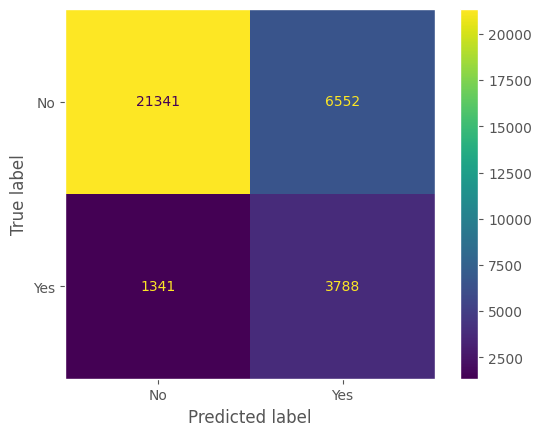

In [35]:
evaluation(y_test,log_pred)

And try the evaluation model for SVM:

              precision    recall  f1-score   support

          No       0.94      0.81      0.87     27893
         Yes       0.41      0.74      0.53      5129

    accuracy                           0.80     33022
   macro avg       0.68      0.77      0.70     33022
weighted avg       0.86      0.80      0.82     33022

True Yes	: 3783	(73.76%)
False Yes	: 1346	(26.24%)
True No		: 22522	(80.74%)
False No	: 5371	(19.26%)


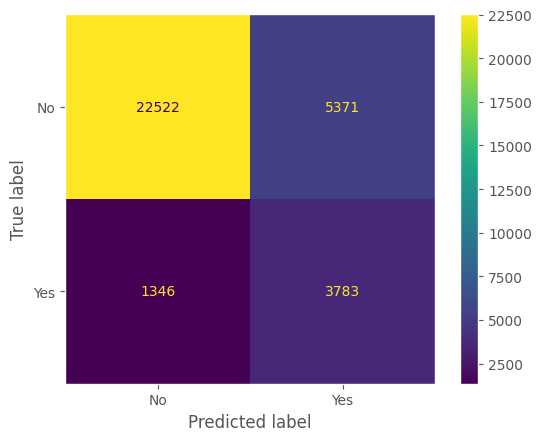

In [36]:
evaluation(y_test,svm_pred)

Each model has been evaluated, it's time to compare the results. Let's check the percentages of correct and incorrect predictions of both models.

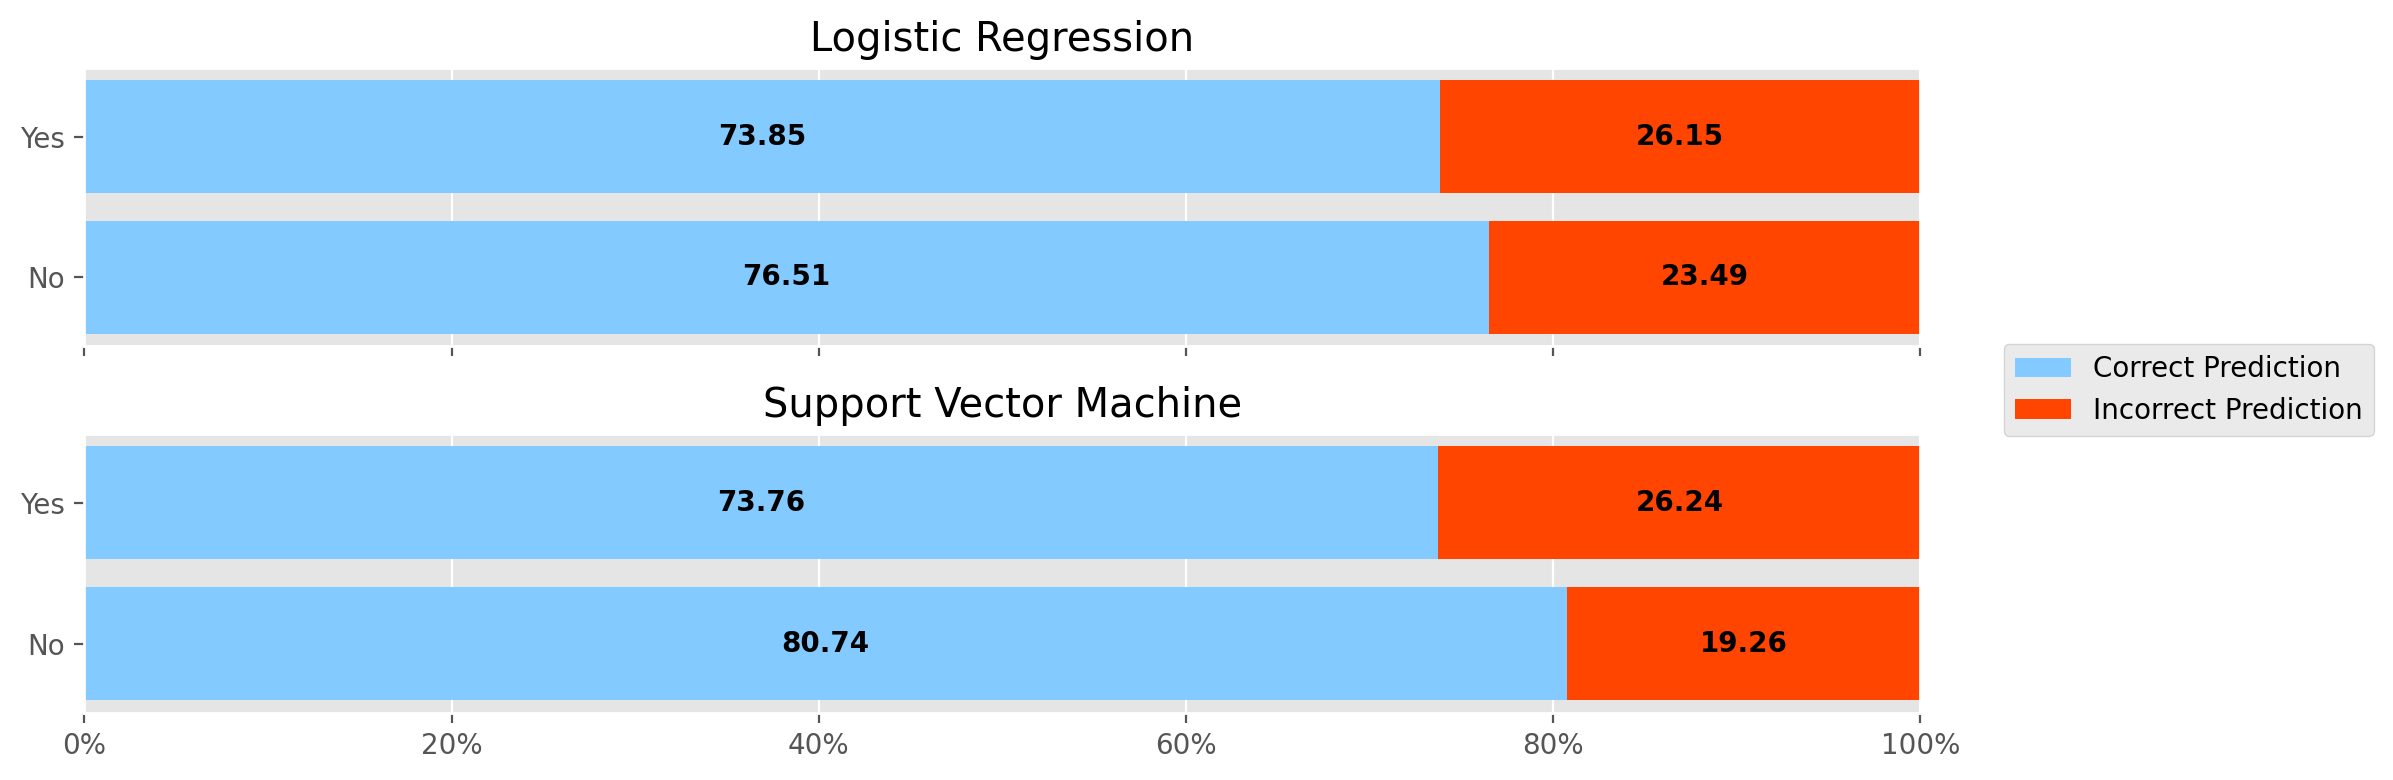

In [44]:
nrows,ncols = 2,1
fig,ax = plt.subplots(figsize=(10,4),dpi=200,nrows=nrows,ncols=ncols,sharex=True)

for i,j,k in zip(range(nrows),[log_pred,svm_pred],["Logistic Regression","Support Vector Machine"]):
    true_yes = confusion_matrix(y_test,j)[1,1]
    false_yes = confusion_matrix(y_test,j)[1,0]
    true_no = confusion_matrix(y_test,j)[0,0]
    false_no = confusion_matrix(y_test,j)[0,1]

    ax[i].barh("No",true_no / (true_no + false_no) * 100,color= "#82CAFF",label="Correct Prediction")
    ax[i].barh("No",false_no / (true_no + false_no) * 100,left=true_no / (true_no + false_no) * 100,color="#FF4500",label="Incorrect Prediction")
    ax[i].barh("Yes",true_yes / (true_yes + false_yes) * 100,color="#82CAFF")
    ax[i].barh("Yes",false_yes / (true_yes + false_yes) * 100,left=true_yes / (true_yes + false_yes) * 100,color="#FF4500")

    ax[i].set_title(k)
    ax[i].set_xlim(xmax=100)

    for container in ax[i].containers:
        ax[i].bar_label(container,fmt="%.2f",label_type="center",color="k",fontweight="bold")

ax[i].xaxis.set_major_formatter(tick.FuncFormatter(lambda x,_: f"{round(x)}%"))
handles,labels = ax[i].get_legend_handles_labels()
fig.legend(handles,labels,bbox_to_anchor=(1,0.5),loc="center left")

plt.tight_layout()
plt.show()

After creating the comparison chart above regarding the accuracy of rainfall predictions against training data, we will now proceed to compare the performance values of both models. For precision_score(), recall_score(), and f1_score(), the parameter average = weighted is used to account for class imbalance.

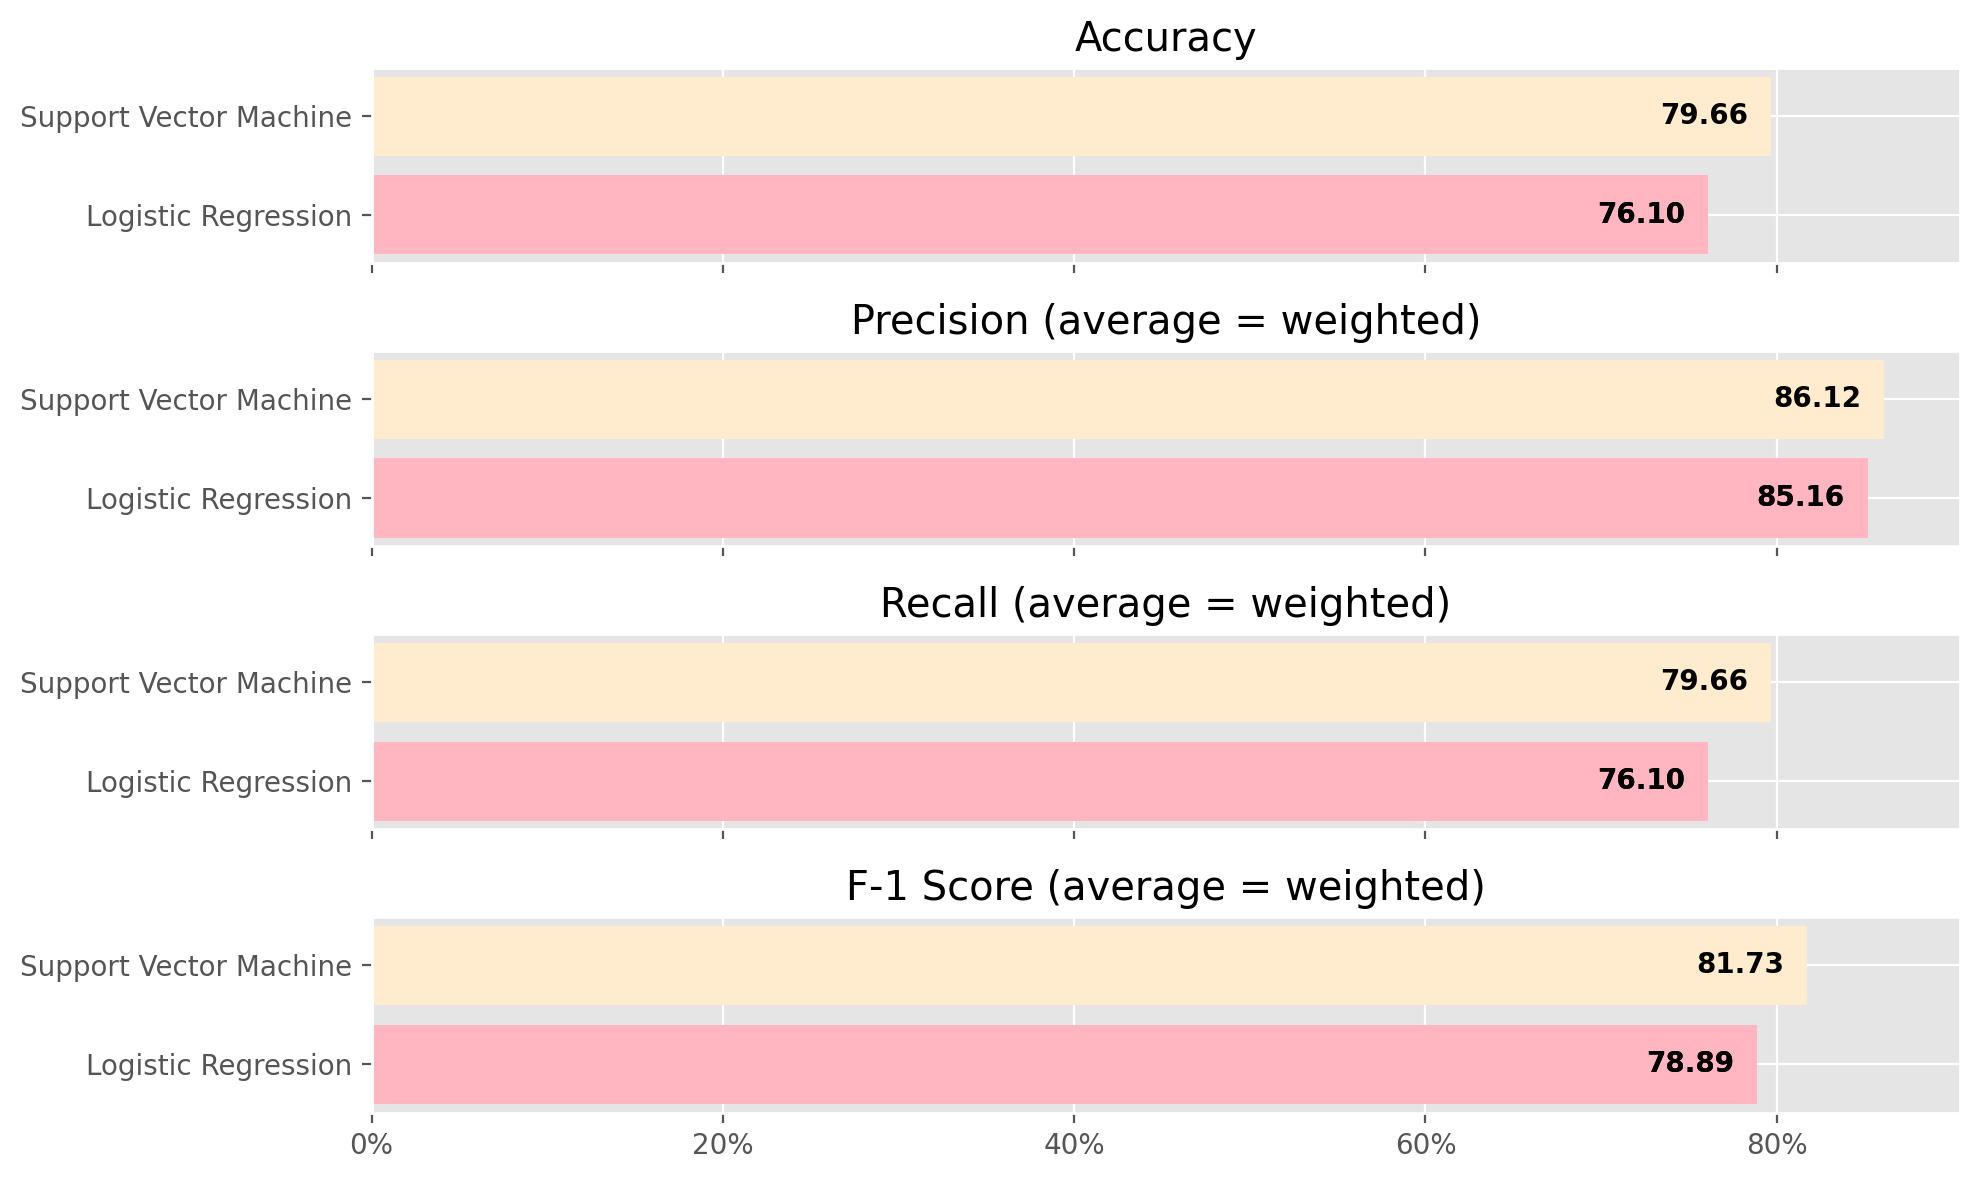

In [46]:
nrows,ncols = 4,1
fig,ax = plt.subplots(figsize=(10,6),dpi=200,nrows=nrows,ncols=ncols,sharex=True)

for i in range(nrows):
    for j,k,l in zip(
        [log_pred,svm_pred],
        ["Logistic Regression","Support Vector Machine"],
        ["lightpink","blanchedalmond"]
    ):
        if i == 0:
            metric = accuracy_score(y_test,j) * 100
            title = "Accuracy"
        elif i == 1:
            metric = precision_score(y_test,j,average="weighted") * 100
            title = "Precision (average = weighted)"
        elif i == 2:
            metric = recall_score(y_test,j,average="weighted") * 100
            title = "Recall (average = weighted)"
        else:
            metric = f1_score(y_test,j,average="weighted") * 100
            title = "F-1 Score (average = weighted)"

        ax[i].barh(k,metric,color=l)
        ax[i].set_title(title)

        for container in ax[i].containers:
            ax[i].bar_label(container,fmt="%.2f",padding=-40,color="black",fontweight="bold")

ax[i].xaxis.set_major_formatter(tick.FuncFormatter(lambda x,_: f"{round(x)}%"))

plt.tight_layout()
plt.show()

**Conclusion**: Based on the given data, there are differences in the performance between the SVM model and the logistic regression model. To determine which model is better, we can consider several evaluation metrics provided.

1. Accuracy: The SVM model has an accuracy of 79.66%, while the logistic regression model has an accuracy of 76.10%. In terms of accuracy, the SVM model performs slightly better.

2. Precision: The SVM model has a precision of 86.12%, while the logistic regression model has a precision of 85.16%. Both models have similar performance in terms of precision.

3. Recall: The SVM model has a recall of 79.66%, while the logistic regression model has a recall of 76.10%. In terms of recall, the SVM model performs slightly better.

4. F1 Score: The SVM model has an F1 score of 81.73%, while the logistic regression model has an F1 score of 78.89%. In terms of F1 score, the SVM model performs better.

Based on this comparison, overall, the SVM model appears to provide better performance than the logistic regression model. 

## Final Models

Create the final logistic regression model by training it with the whole dataset. In addition, this also shows the model equation.

In [47]:
final_log_model = LogisticRegression(class_weight="balanced",max_iter=5000)
final_log_model.fit(X,y)

e,x = sp.Symbol("e"),sp.Symbol("(x)")
x_symbols = [sp.Symbol(f"({i})") for i in X.columns]

sums = np.round(final_log_model.intercept_[0],6)
for i in range(len(X.columns)):
    sums += x_symbols[i] * np.round(final_log_model.coef_[0][i],6)

sp.Eq(sp.pi*x,e**sums / (1 + e**sums))

Eq(pi*(x), e**(0.066517*(humidity3pm) + 0.001283*(humidity9am) - 0.196871*(location_Albany) + 0.671138*(location_Albury) + 0.190029*(location_AliceSprings) + 0.291766*(location_BadgerysCreek) - 0.30536*(location_Ballarat) + 0.443486*(location_Bendigo) + 0.609047*(location_Brisbane) - 0.181026*(location_Cairns) + 0.422261*(location_Canberra) + 0.412993*(location_Cobar) - 0.059155*(location_CoffsHarbour) + 0.054909*(location_Dartmoor) - 0.978533*(location_Darwin) - 0.716415*(location_GoldCoast) - 0.154798*(location_Hobart) - 0.488554*(location_Katherine) - 0.161026*(location_Launceston) - 0.24989*(location_Melbourne) - 0.058441*(location_MelbourneAirport) + 0.262909*(location_Mildura) - 0.00838*(location_Moree) + 0.101666*(location_MountGambier) - 0.577085*(location_MountGinini) + 0.050593*(location_Newcastle) - 0.121473*(location_Nhil) - 0.914016*(location_NorahHead) - 0.40749*(location_NorfolkIsland) + 0.245862*(location_Nuriootpa) + 0.10988*(location_PearceRAAF) + 0.537064*(location_P

Repeat the step above for SVM.

In [48]:
final_svm_model = SVC(class_weight="balanced")
final_svm_model.fit(X,y)

SVC(class_weight='balanced')

Create a function for prediction:

In [49]:
def predict(model,mintemp,maxtemp,rainfall,windgustspeed,humidity9am,humidity3pm,pressure9am,pressure3pm,temp3pm,location,windgustdir,winddir9am,winddir3pm,raintoday):
    inputs = pd.DataFrame(columns=X.columns)
    location_code = [0 for i in inputs.columns[pd.Series(inputs.columns).str.startswith("location")]]
    if location != "Adelaide":
        n = 0
        for i in inputs.columns[pd.Series(inputs.columns).str.startswith("location")]:
            if location in i:
                location_code[n] = 1
                break
            n += 1 

    windgustdir_code = [0 for i in inputs.columns[pd.Series(inputs.columns).str.startswith("windgustdir")]]
    if windgustdir != "E":
        n = 0
        for i in inputs.columns[pd.Series(inputs.columns).str.startswith("windgustdir")]:
            if windgustdir in i:
                windgustdir_code[n] = 1
                break
            n += 1 

    winddir9am_code = [0 for i in inputs.columns[pd.Series(inputs.columns).str.startswith("winddir9am")]]
    if winddir9am != "E":
        n = 0
        for i in inputs.columns[pd.Series(inputs.columns).str.startswith("winddir9am")]:
            if winddir9am in i:
                winddir9am_code[n] = 1
                break
            n += 1 

    winddir3pm_code = [0 for i in inputs.columns[pd.Series(inputs.columns).str.startswith("winddir3pm")]]
    if winddir3pm != "E":
        n = 0
        for i in inputs.columns[pd.Series(inputs.columns).str.startswith("winddir3pm")]:
            if winddir3pm in i:
                winddir3pm_code[n] = 1
                break
            n += 1 

    if raintoday == "Yes":
        raintoday_code = [1]
    elif raintoday == "No":
        raintoday_code = [0]

    inputs = pd.DataFrame(
        data=[[mintemp,maxtemp,rainfall,windgustspeed,humidity9am,humidity3pm,pressure9am,pressure3pm,temp3pm] + location_code + windgustdir_code + winddir9am_code + winddir3pm_code + raintoday_code],
        columns=X.columns
    )

    pred= model.predict(inputs)[0]

    if pred == "Yes":
        return f"It will be raining tomorrow"

    elif pred == "No":
        return f"It won't be raining tomorrow"

Implement the final models by inputting new data:

In [50]:
for i,j in zip([final_log_model,final_svm_model],["Logistic Regression","Support Vector Machine"]):
    print(f'{j}\t: {predict(i,10,20,0.25,35,65,50,1015,1015,20,"Adelaide","E","E","E","No")}')

Logistic Regression	: It won't be raining tomorrow
Support Vector Machine	: It won't be raining tomorrow


Save all the final models for future use:

In [51]:
model = [final_log_model,final_svm_model]
file_name = ["logistic_regression_model_fp2","support_vector_machine_model_fp2"]
extension = "json"

for i,j in zip(model,file_name):
    with open(f"{j}.{extension}","wb") as files:
        dump(i,files)
    print(f"{j}.{extension} has been downloaded")

logistic_regression_model_fp2.json has been downloaded
support_vector_machine_model_fp2.json has been downloaded


**Conclusion**: Based on the analysis above, it can be seen that both logistic regression and SVM models handled the class imbalance problem well, which was proven by the high percentages of correct predictions (true Yes and true No). Furthermore, both models had high scores of ±80% on multiple metrics such as accuracy, precision, recall, and f-1 score. Since the SVM model performed slightly better than the logistic regression model, it's recommended to use the former one. Hence, it can be concluded that the SVM model is the best model to predict rain in Australia and can be used for future use.